In [2]:
import tensorflow as tf
import cv2
import sys
import numpy as np
import random
from matplotlib import pyplot as plt


import keras
from keras import losses
from keras.models import Sequential,Model
from keras.layers.core import *
from keras.layers import*
from keras.optimizers import *
from keras.utils import to_categorical
from keras import backend as K

from Mynet import MyNet
from losses import loss

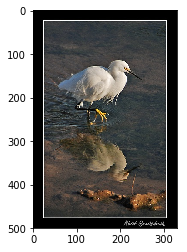

In [3]:
### read the image
img_bgr= cv2.imread("./pytorch-unsupervised-segmentation/PASCAL_VOC_2012/2007_008670.jpg")
img_rgb = img_bgr[:,:,::-1]
plt.imshow(img_rgb)
plt.show()




In [4]:
### normalize the data
data       = img_rgb.astype('float64')/255.
data       = data.reshape((1,data.shape[0],data.shape[1],data.shape[2]))
Width      = data.shape[1]
Height     = data.shape[2]
### some info about the image
print('Width: ', Width)
print('Height: ',Height)

Width:  500
Height:  331


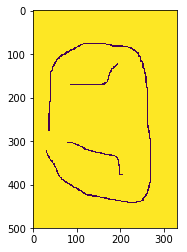

In [6]:
### read the scribble 
mask = cv2.imread("./pytorch-unsupervised-segmentation/PASCAL_VOC_2012/2007_008670_scribble.png",-1)
# mask = mask[:,:,::-1]
plt.imshow(mask)
plt.show()
mask = mask.reshape(-1)
mask_inds = np.unique(mask)
mask_inds = np.delete(mask_inds, np.argwhere(mask_inds==255) )
inds_sim = np.where(mask == 255)[0] 
inds_scr = np.where(mask != 255)[0]
# inds_scr = inds_scr[0:2]
# inds_scr = np
# inds_scr = np.where(mask_rgb == 255)
# print(inds_scr)

In [7]:
### build a mask
index_scr = np.zeros((Width*Height,1)).astype(np.float64)
index_scr[inds_scr] = 1
print(inds_scr)

[ 25270  25271  25272 ... 146537 146538 146539]


In [11]:
lr       = 0.1
momentum = 0.9
decay    = 1

nChannel = 100
nCluster = 150
nCov     = 2
mu       = 5
v        = 0.25
scribble = True
# print(inds_scr)
# u        = np.zeros((data.shape[0],data.shape[1]))
# print(data.shape)
model = MyNet(Width,Height,nChannel, nCluster,nCov)
sgd = SGD(lr = lr, decay = decay, momentum = momentum, nesterov = True)
model.summary()
model.compile(optimizer= sgd, loss=loss(mu,nCluster,Width,Height,scribble,v,index_scr).losses)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 500, 331, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 500, 331, 100)     2800      
_________________________________________________________________
batch_normalization_6 (Batch (None, 500, 331, 100)     400       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 500, 331, 100)     90100     
_________________________________________________________________
batch_normalization_7 (Batch (None, 500, 331, 100)     400       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 500, 331, 150)     15150     
_________________________________________________________________
batch_normalization_8 (Batch (None, 500, 331, 150)     600 

In [12]:
num_epoch = 1000
# print(data.shape)
model.fit(data, data,epochs = num_epoch)


Epoch 1/1000
1/1 [==============================] - 5s 5s/step - loss: 6.6080
Epoch 2/1000
1/1 [==============================] - 3s 3s/step - loss: 4.9616
Epoch 3/1000
1/1 [==============================] - 3s 3s/step - loss: 4.4942
Epoch 4/1000
1/1 [==============================] - 4s 4s/step - loss: 4.3169
Epoch 5/1000
1/1 [==============================] - 3s 3s/step - loss: 4.1858
Epoch 6/1000
1/1 [==============================] - 4s 4s/step - loss: 4.0700
Epoch 7/1000
1/1 [==============================] - 6s 6s/step - loss: 3.9630
Epoch 8/1000
1/1 [==============================] - 5s 5s/step - loss: 3.8605
Epoch 9/1000
1/1 [==============================] - 4s 4s/step - loss: 3.7671
Epoch 10/1000
1/1 [==============================] - 4s 4s/step - loss: 3.6816
Epoch 11/1000
1/1 [==============================] - 4s 4s/step - loss: 3.5978
Epoch 12/1000
1/1 [==============================] - 4s 4s/step - loss: 3.5164
Epoch 13/1000
1/1 [==============================] - 4s 4s/st

1/1 [==============================] - 3s 3s/step - loss: 2.1000
Epoch 105/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0989
Epoch 106/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0979
Epoch 107/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0969
Epoch 108/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0959
Epoch 109/1000
1/1 [==============================] - 4s 4s/step - loss: 2.0950
Epoch 110/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0940
Epoch 111/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0931
Epoch 112/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0921
Epoch 113/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0912
Epoch 114/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0903
Epoch 115/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0894
Epoch 116/1000
1/1 [==============================] - 3

1/1 [==============================] - 4s 4s/step - loss: 2.0326
Epoch 207/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0322
Epoch 208/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0317
Epoch 209/1000
1/1 [==============================] - 4s 4s/step - loss: 2.0313
Epoch 210/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0308
Epoch 211/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0304
Epoch 212/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0299
Epoch 213/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0295
Epoch 214/1000
1/1 [==============================] - 4s 4s/step - loss: 2.0291
Epoch 215/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0286
Epoch 216/1000
1/1 [==============================] - 3s 3s/step - loss: 2.0282
Epoch 217/1000
1/1 [==============================] - 4s 4s/step - loss: 2.0278
Epoch 218/1000
1/1 [==============================] - 5

1/1 [==============================] - 3s 3s/step - loss: 1.9942
Epoch 309/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9939
Epoch 310/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9936
Epoch 311/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9933
Epoch 312/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9930
Epoch 313/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9927
Epoch 314/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9923
Epoch 315/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9920
Epoch 316/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9917
Epoch 317/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9914
Epoch 318/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9911
Epoch 319/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9908
Epoch 320/1000
1/1 [==============================] - 3

1/1 [==============================] - 3s 3s/step - loss: 1.9668
Epoch 411/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9666
Epoch 412/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9663
Epoch 413/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9661
Epoch 414/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9659
Epoch 415/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9657
Epoch 416/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9655
Epoch 417/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9653
Epoch 418/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9650
Epoch 419/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9648
Epoch 420/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9646
Epoch 421/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9644
Epoch 422/1000
1/1 [==============================] - 3

1/1 [==============================] - 3s 3s/step - loss: 1.9475
Epoch 513/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9473
Epoch 514/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9472
Epoch 515/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9470
Epoch 516/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9468
Epoch 517/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9466
Epoch 518/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9465
Epoch 519/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9463
Epoch 520/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9462
Epoch 521/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9460
Epoch 522/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9458
Epoch 523/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9457
Epoch 524/1000
1/1 [==============================] - 3

1/1 [==============================] - 3s 3s/step - loss: 1.9326
Epoch 615/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9325
Epoch 616/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9324
Epoch 617/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9322
Epoch 618/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9321
Epoch 619/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9320
Epoch 620/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9318
Epoch 621/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9317
Epoch 622/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9316
Epoch 623/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9314
Epoch 624/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9313
Epoch 625/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9312
Epoch 626/1000
1/1 [==============================] - 3

1/1 [==============================] - 3s 3s/step - loss: 1.9204
Epoch 717/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9203
Epoch 718/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9202
Epoch 719/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9201
Epoch 720/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9200
Epoch 721/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9198
Epoch 722/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9197
Epoch 723/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9196
Epoch 724/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9195
Epoch 725/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9194
Epoch 726/1000
1/1 [==============================] - 5s 5s/step - loss: 1.9193
Epoch 727/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9192
Epoch 728/1000
1/1 [==============================] - 4

1/1 [==============================] - 3s 3s/step - loss: 1.9095
Epoch 819/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9094
Epoch 820/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9093
Epoch 821/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9092
Epoch 822/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9091
Epoch 823/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9090
Epoch 824/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9089
Epoch 825/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9088
Epoch 826/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9087
Epoch 827/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9086
Epoch 828/1000
1/1 [==============================] - 4s 4s/step - loss: 1.9085
Epoch 829/1000
1/1 [==============================] - 3s 3s/step - loss: 1.9084
Epoch 830/1000
1/1 [==============================] - 4

1/1 [==============================] - 3s 3s/step - loss: 1.8998
Epoch 921/1000
1/1 [==============================] - 4s 4s/step - loss: 1.8997
Epoch 922/1000
1/1 [==============================] - 4s 4s/step - loss: 1.8996
Epoch 923/1000
1/1 [==============================] - 3s 3s/step - loss: 1.8995
Epoch 924/1000
1/1 [==============================] - 4s 4s/step - loss: 1.8995
Epoch 925/1000
1/1 [==============================] - 4s 4s/step - loss: 1.8994
Epoch 926/1000
1/1 [==============================] - 4s 4s/step - loss: 1.8993
Epoch 927/1000
1/1 [==============================] - 3s 3s/step - loss: 1.8992
Epoch 928/1000
1/1 [==============================] - 3s 3s/step - loss: 1.8991
Epoch 929/1000
1/1 [==============================] - 4s 4s/step - loss: 1.8990
Epoch 930/1000
1/1 [==============================] - 3s 3s/step - loss: 1.8989
Epoch 931/1000
1/1 [==============================] - 3s 3s/step - loss: 1.8988
Epoch 932/1000
1/1 [==============================] - 3

In [13]:
### clustering

output = model.predict(data)


In [16]:
### prepare for the colour
label_colours = np.random.randint(255,size=(nCluster,3))

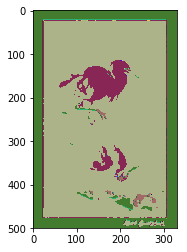

In [17]:
### plot the data ?
labels = np.argmax(output.reshape((Width*Height,nCluster)),axis = 1)
# print(labels.reshape((Width*Height)))
### image show
im_target_rgb = np.array([label_colours[c] for c in labels])
# print(im_target_rgb.shape)
im_target_rgb = im_target_rgb.reshape((Width,Height,3)).astype(np.uint8)

plt.imshow(im_target_rgb)
plt.show()

In [18]:
cv2.imwrite( "waterbird_mu005_epoch1000_v025.png", im_target_rgb )

True